In [1]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Assignments/HW5/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Assignments/HW5/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Assignments/HW5/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Assignments/HW5/venv/bin/python -m pip install --upgrade pip' command.


# Q1

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import display, HTML

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, hinge_loss, log_loss, make_scorer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from pprint import pprint



display_dict = lambda x: display(HTML(pd.DataFrame(x).to_html(index=False)))

In [3]:
iris = load_iris()
X = iris["data"]
y = iris["target"]
iris["feature_names"]
target_names = iris["target_names"]

iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
def plot_decision_boundary(clf, X, y, ax=None, **kwargs):
    
    x1_min, x2_min = X.min(axis=0) - 1
    x1_max, x2_max = X.max(axis=0) + 1


    diff1, diff2 = (X.max(axis=0) - X.min(axis=0))/100
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, diff1), np.arange(x2_min, x2_max, diff2))

    
    XX = np.c_[xx1.ravel(), xx2.ravel()]
    preds = clf.predict(XX).reshape(xx2.shape)
    
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx1, xx2, preds, cmap="Blues")
    ax.scatter(*X.T, c=y)
    if "title" in kwargs:
        ax.set_title(kwargs["title"])
    
    if "xlabel" in kwargs:
        ax.set_xlabel(kwargs["xlabel"])
    
    if "ylabel" in kwargs:
        ax.set_ylabel(kwargs["ylabel"])



def compute_metrics(clf, X, y, average="macro"):
    preds = clf.predict(X)
    return {
        "accuracy": accuracy_score(y, preds),
        "precision": precision_score(y, preds, average=average),
        "recall": recall_score(y, preds, average=average),
        "f1_score": f1_score(y, preds, average=average)
    }

### Q1.A.1

(150, 2)


accuracy,precision,recall,f1_score
0.966667,0.966787,0.966667,0.966663


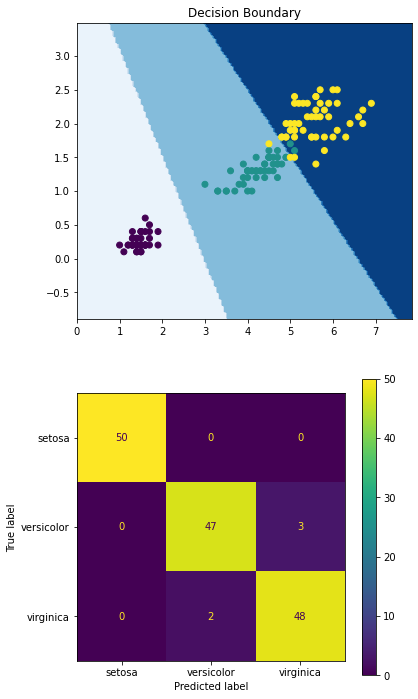

In [5]:
petal_length = 2
petal_width = 3
indices = [petal_length, petal_width]
clf = SVC(kernel="linear")

print(X[:, indices].shape)
clf.fit(X[:, indices], y)

display_dict([compute_metrics(clf, X[:, indices], y)])
fig, axes = plt.subplots(2, 1, figsize=(6,12))
plot_decision_boundary(clf, X[:, indices], y, title="Decision Boundary", ax=axes[0])
plot_confusion_matrix(clf, X[:, indices], y, display_labels=target_names, ax=axes[1])

### Q1.A.2

kernel,accuracy,precision,recall,f1_score
linear,0.966667,0.966787,0.966667,0.966663
rbf,0.953333,0.954369,0.953333,0.953291
poly,0.966667,0.966787,0.966667,0.966663


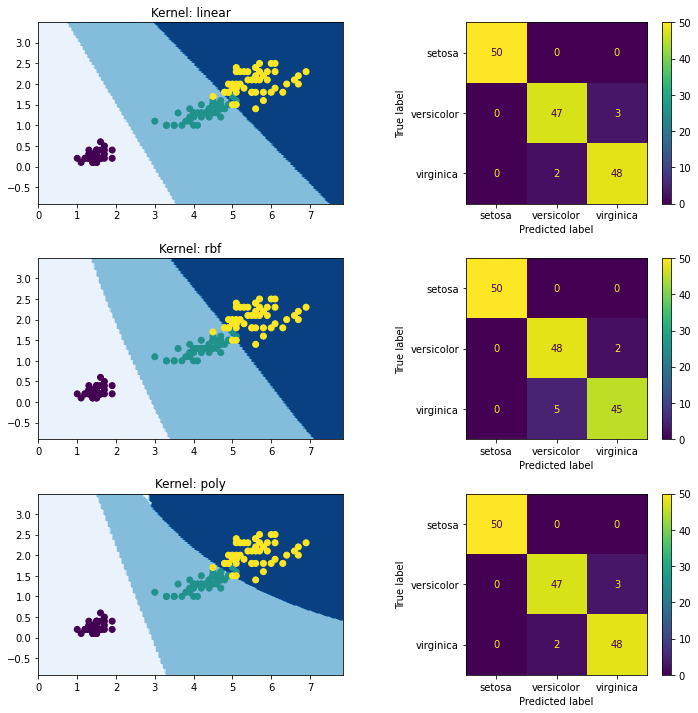

In [6]:
# Part 1
kernels = ["linear", "rbf", "poly"]
info = []
fig, axes = plt.subplots(3, 2, figsize=(12, 12), gridspec_kw={"hspace": 0.3})
for idx, k in zip(range(len(axes)), kernels):
    clf = SVC(kernel=k).fit(X[..., indices], y)
    res = {"kernel": k}
    metrics = compute_metrics(clf, X[:, indices], y)
    res.update(metrics)
    info.append(res)
    ax = axes[idx, 0]
    plot_decision_boundary(clf, X[:, indices], y, title=f"Kernel: {k}", ax=ax)
    ax = axes[idx, 1]
    plot_confusion_matrix(clf, X[:, indices], y, display_labels=target_names, ax=ax)
    

display_dict(info)

gamma,accuracy,precision,recall,f1_score
0.1,0.953333,0.954369,0.953333,0.953291
1.0,0.966667,0.966787,0.966667,0.966663
10.0,0.966667,0.966787,0.966667,0.966663


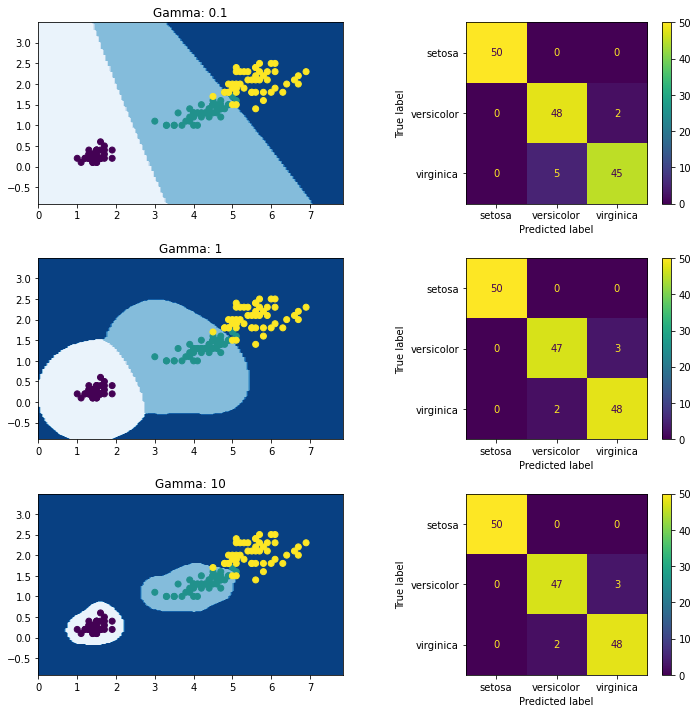

In [7]:
gammas = [0.1, 1, 10]
info = []
fig, axes = plt.subplots(3, 2, figsize=(12, 12), gridspec_kw={"hspace": 0.3})
for idx, g in zip(range(len(axes)), gammas):
    clf = SVC(kernel="rbf", gamma=g).fit(X[..., indices], y)
    res = {"gamma": g}
    metrics = compute_metrics(clf, X[:, indices], y)
    res.update(metrics)
    info.append(res)
    plot_decision_boundary(clf, X[:, indices], y, title=f"Gamma: {g}", ax=axes[idx, 0])
    plot_confusion_matrix(clf, X[:, indices], y, display_labels=target_names, ax=axes[idx, 1])
    

display_dict(info)

C,accuracy,precision,recall,f1_score
0.01,0.960000,0.960470,0.960000,0.959984
1.00,0.953333,0.954369,0.953333,0.953291
100.00,0.960000,0.960000,0.960000,0.960000


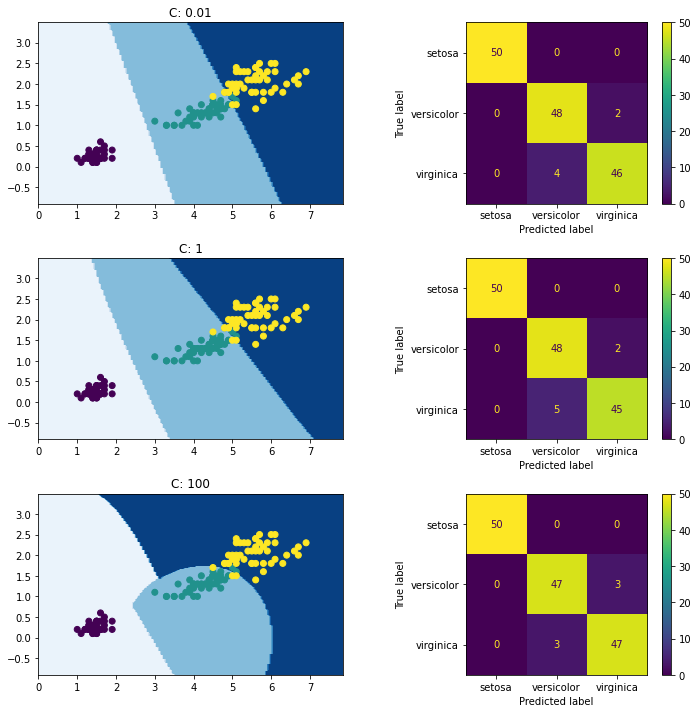

In [8]:
C = [0.01, 1, 100]
info = []
fig, axes = plt.subplots(3, 2, figsize=(12, 12), gridspec_kw={"hspace": 0.3})
for idx, c in zip(range(len(axes)), C):
    clf = SVC(kernel="rbf", C=c).fit(X[..., indices], y)
    res = {"C": c}
    metrics = compute_metrics(clf, X[:, indices], y)
    res.update(metrics)
    info.append(res)
    plot_decision_boundary(clf, X[:, indices], y, title=f"C: {c}", ax=axes[idx, 0])
    plot_confusion_matrix(clf, X[:, indices], y, display_labels=target_names, ax=axes[idx, 1])

display_dict(info)

kernel,C,gamma
linear,1.668101,0.010000
rbf,1.668101,0.599484
poly,0.599484,0.077426


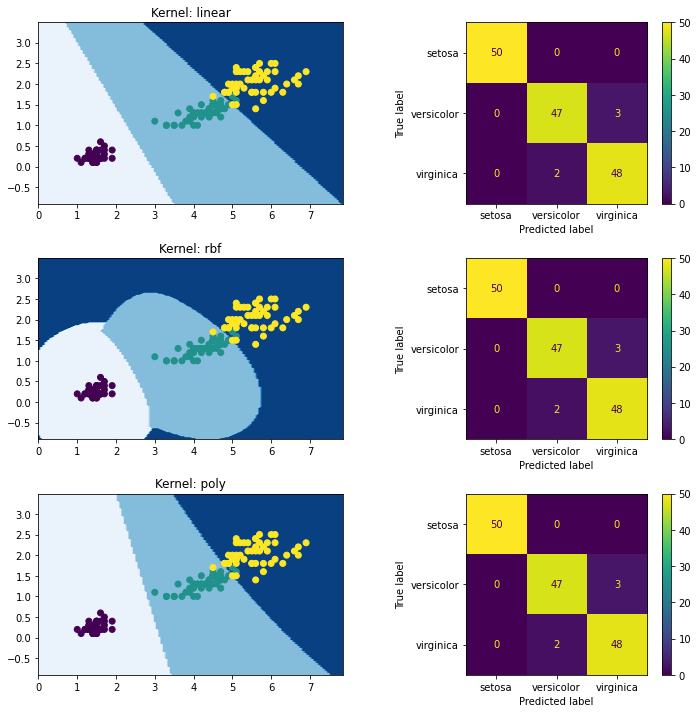

In [17]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def dummy():
    LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)


    # fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"wspace":0.5})

    # plot_decision_boundary(grid.best_estimator_, X[:, indices], y, title=f"Decision Boundary for Best Estimator", ax=axes[0])
    # plot_confusion_matrix(grid.best_estimator_, X[:, indices], y, display_labels=target_names, ax=axes[1])
    # display_dict([compute_metrics(grid.best_estimator_, X[..., indices], y)])

    best_params = []
    kernels = ["linear", "rbf", "poly"]
    info = []
    fig, axes = plt.subplots(3, 2, figsize=(12, 12), gridspec_kw={"hspace": 0.3})
    for idx, k in zip(range(len(axes)), kernels):
        clf = SVC(kernel=k, probability=True, max_iter=200)
        grid = GridSearchCV(estimator=clf, param_grid={
            "C": np.logspace(-2, 2, base=10, num=10).tolist(),
            "gamma": np.logspace(-2, 2, base=10, num=10).tolist(),
        }, scoring=LogLoss, verbose=False)
        params = {"kernel": k}
        grid.fit(X[..., indices], y)
        params.update(grid.best_params_)
        best_params.append(params)

        clf = SVC(kernel=k, **grid.best_params_).fit(X[..., indices], y)
        res = {"kernel": k}
        metrics = compute_metrics(clf, X[:, indices], y)
        res.update(metrics)
        info.append(res)
        ax = axes[idx, 0]
        plot_decision_boundary(clf, X[:, indices], y, title=f"Kernel: {k}", ax=ax)
        ax = axes[idx, 1]
        plot_confusion_matrix(clf, X[:, indices], y, display_labels=target_names, ax=ax)

    display_dict(best_params)
dummy()

linear
Fitting 5 folds for each of 64 candidates, totalling 320 fits
rbf
Fitting 5 folds for each of 64 candidates, totalling 320 fits
poly
Fitting 5 folds for each of 64 candidates, totalling 320 fits


kernel,accuracy,precision,recall,f1_score
linear,0.966667,0.966787,0.966667,0.966663
rbf,0.966667,0.966787,0.966667,0.966663
poly,0.973333,0.973825,0.973333,0.973323


kernel,C,gamma
linear,1.485994,8.832716
rbf,1.485994,0.452862
poly,2.691800,16.000000


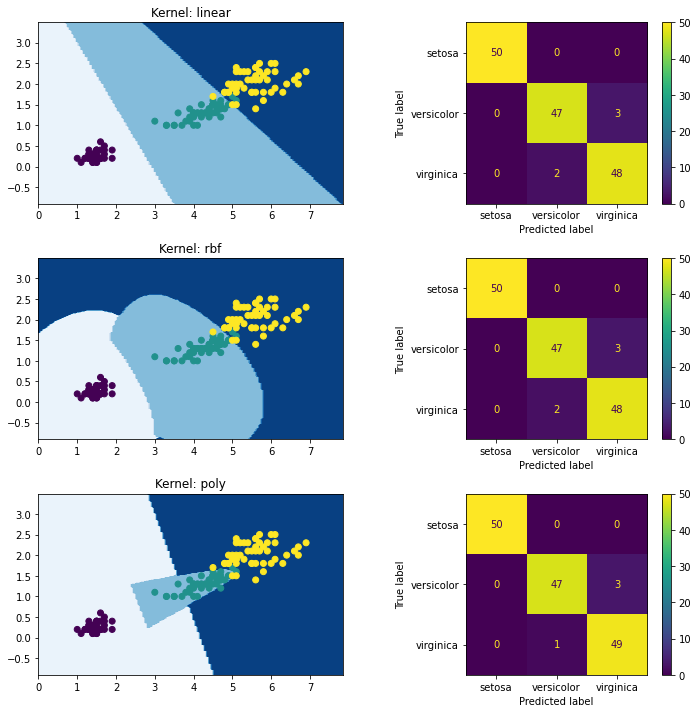

In [75]:
# Part 1
kernels = ["linear", "rbf", "poly"]
info = []
best_params = []
fig, axes = plt.subplots(3, 2, figsize=(12, 12), gridspec_kw={"hspace": 0.3})
for idx, k in zip(range(len(axes)), kernels):
    print(k)
    clf = SVC(kernel=k, probability=True, max_iter=-1, tol=0.01)
    grid = GridSearchCV(estimator=clf, param_grid={
            "C": np.logspace(-2, 4, base=2, num=8).tolist(),
            "gamma": np.logspace(-2, 4, base=2, num=8).tolist(),
        }, scoring=LogLoss, n_jobs=-1, verbose=True)

    grid.fit(X[..., indices], y)
    params= {"kernel": k} 
    params.update(grid.best_params_)
    best_params.append(params)

    clf = grid.best_estimator_

    res = {"kernel": k}
    metrics = compute_metrics(clf, X[:, indices], y)
    res.update(metrics)
    info.append(res)
    plot_decision_boundary(clf, X[:, indices], y, title=f"Kernel: {k}", ax=axes[idx, 0])
    plot_confusion_matrix(clf, X[:, indices], y, display_labels=target_names, ax=axes[idx, 1])

display_dict(info)
display_dict(best_params)

Q1.B

kernel,method,accuracy,precision,recall,f1_score
linear,ovr,0.966667,0.966787,0.966667,0.966663
linear,ovo,0.966667,0.966787,0.966667,0.966663
rbf,ovr,0.953333,0.954369,0.953333,0.953291
rbf,ovo,0.953333,0.954369,0.953333,0.953291
poly,ovr,0.966667,0.966787,0.966667,0.966663
poly,ovo,0.966667,0.966787,0.966667,0.966663


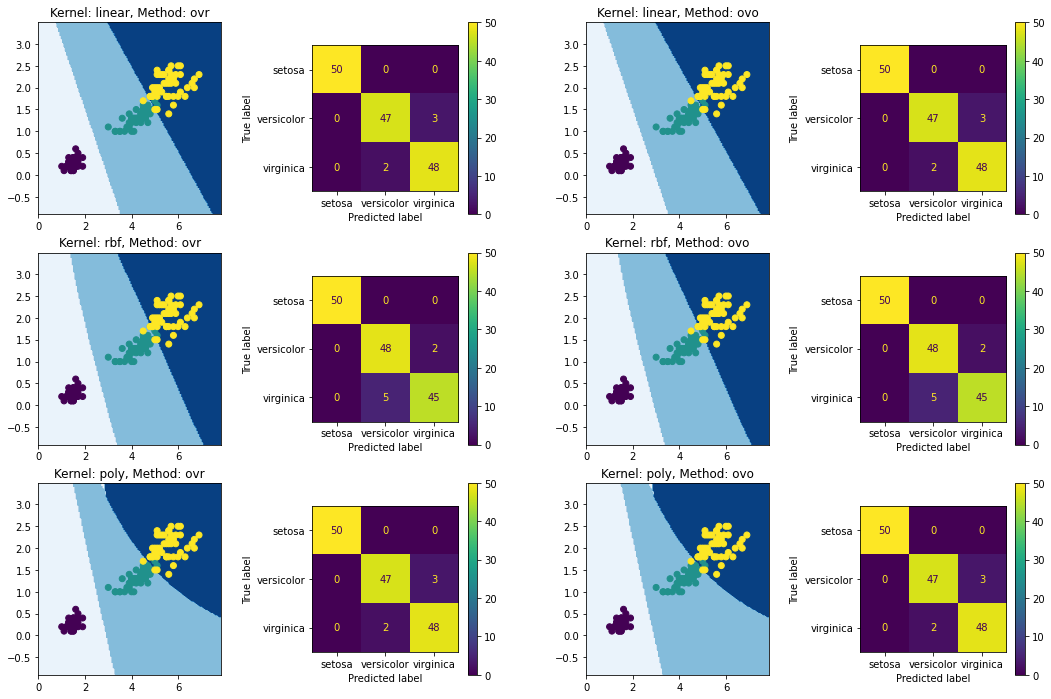

In [77]:
from itertools import combinations, product

kernels = ["linear", "rbf", "poly"]
function_shape = ["ovr", 'ovo']
d = 3
combs = list(product(kernels, function_shape))
nrows = 3
ncols = 2
fig, axes = plt.subplots(3, 4, figsize=(18, 12), gridspec_kw={"hspace": 0.2, "wspace": 0.5})
axes = axes.reshape(-1, 2)
info = []
for idx, (k, f) in zip(range(len(axes)), combs):
    clf = SVC(kernel=k,decision_function_shape=f)
    clf.fit(X[..., indices], y)
    res = {"kernel": k, "method": f}
    res.update(compute_metrics(clf, X[..., indices], y))
    info.append(res)
    plot_decision_boundary(clf, X[..., indices], y, ax=axes[idx, 0], title=f"Kernel: {k}, Method: {f}")
    plot_confusion_matrix(clf, X[:, indices], y, display_labels=target_names, ax=axes[idx, 1])
display_dict(info)

# Q2

Level,Salary,linear,rbf,poly
1,45000,-35999.82,45000.130104,40142.413575
2,50000,12000.14,49999.819384,44567.154407
3,60000,60000.10,60000.195285,56577.165236
4,80000,108000.06,79999.792338,79965.081061
5,110000,156000.02,110000.201533,118523.536880
6,150000,203999.98,149999.772194,176045.167694
7,200000,251999.94,200000.251252,256322.608497
8,300000,299999.90,299999.723920,363148.494291
9,500000,347999.86,561493.953203,500315.460080
10,1000000,395999.82,999999.801756,671616.140845


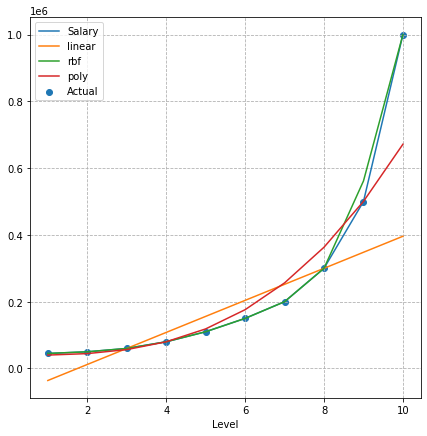

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
clf = SVR()
df = pd.read_csv("data/Q2-Part1.csv", index_col=False)

transformer = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(sparse=False), ["Position", "Level"]),
    ]
)

# X = transformer.fit_transform(df)
X = df["Level"].to_numpy().reshape(-1, 1)
y = df["Salary"].to_numpy()
kernels = ["linear", "rbf", "poly"]
preds = df[["Level", "Salary"]].to_dict(orient="list")

for k in kernels:
    clf = SVR(kernel=k, C=10**7).fit(X, y)
    preds[k] = clf.predict(X)


results = pd.DataFrame(preds,)

# results["Actual"] = df["Salary"]
# results["Level"] = df["Level"]

fig, ax = plt.subplots(figsize=(7,7))


display_dict(preds)

results.plot(x="Level", ax=ax)
ax.scatter(x=df["Level"],y=df["Salary"], label="Actual")
ax.grid(linestyle="--")
ax.legend()

## Q2.B

In [29]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import display, HTML

from sklearn.svm import SVR, NuSVR, LinearSVR

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, hinge_loss, log_loss, make_scorer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from pprint import pprint


from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


display_dict = lambda x: display(HTML(pd.DataFrame(x).to_html(index=False)))


In [26]:
df_train = pd.read_csv("data/H1.csv")
df_test = pd.read_csv("data/H2.csv")
df_test.fillna(method="bfill", inplace=True)


print(df_train.select_dtypes("object").columns)
print(df_train.select_dtypes("int64").columns)
print(df_train.select_dtypes(float).columns)
display(df_train)

Index(['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'DepositType', 'CustomerType', 'ReservationStatus'],
      dtype='object')
Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests'],
      dtype='object')
Index(['ADR'], dtype='object')


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,342,2015,July,27,1,0,0,2,0,...,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,0,737,2015,July,27,1,0,0,2,0,...,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,0,7,2015,July,27,1,0,1,1,0,...,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,0,13,2015,July,27,1,0,1,1,0,...,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,0,14,2015,July,27,1,0,2,2,0,...,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,A,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out
40056,0,169,2017,August,35,30,2,9,2,0,...,E,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out
40057,0,204,2017,August,35,29,4,10,2,0,...,E,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out
40058,0,211,2017,August,35,31,4,10,2,0,...,D,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out


In [27]:
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(handle_unknown = 'ignore'), ['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'DepositType', 'CustomerType', 'ReservationStatus']),
       ("min-max", StandardScaler(), [
            'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
            'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
            'Adults', 'Children', 'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled',
            'BookingChanges', 'DaysInWaitingList', 'RequiredCarParkingSpaces','TotalOfSpecialRequests'
       ]),
    ],
)



X_train = transformer.fit_transform(df_train).todense()
X_test = transformer.transform(df_test).todense()

In [34]:
adr_train = df_train["ADR"]


# clf = LinearSVR(tol=0.0001, verbose=True, max_iter=1_000)
clf = NuSVR(nu=0.5, kernel="rbf", max_iter=1_000, cache_size=300)

clf.fit(X_train, adr_train)
preds = clf.predict(X_test)
# preds = adr_encoder.inverse_transform(preds.reshape(-1, 1))

preds = preds.ravel()

diff = df_test["ADR"] - preds

result_df = pd.DataFrame(
    {
        "Actual": df_test["ADR"],
        "Predicted": preds,
        "Difference": diff,
    }
)
display(result_df)
result_df.to_csv("prediction_full.csv")
np.abs(result_df["Difference"].values).mean()